# How Headlines Change the Way We Think?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as smf
from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data


combined_djia.csv: The first 5 columns are Open-Close-High-Low-Volume data for DJIA and the rest 25 columns are news headlines ranging from "Top1" to "Top25".

In [3]:
stock=pd.read_csv(r'data/combined_djia.csv',index_col=0)
stock.shape

(1989, 30)

In [4]:
stock.head(1)

,Open,Close,High,Low,Volume,Top1,Top2,Top3,Top4,Top5,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11734.320312,11759.959961,11388.040039,212830000,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""



# Part 1. Data Preparation
### Build Outcome variable "Y" and binary "Label":
- Label=1 if Outcome>0
- Label=0 else


Seprate the data into train (80%) and test data set (20%)

In [5]:
stock["Y"]=stock["Close"].shift(-1)-stock["Close"]

In [6]:
stock["Label"]=[1 if y>0 else 0 for y in stock["Y"]]

In [7]:
stock.head(1)

,Open,Close,High,Low,Volume,Top1,Top2,Top3,Top4,Top5,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Y,Label
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11734.320312,11759.959961,11388.040039,212830000,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",...,"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",48.029297,1


In [8]:
train=stock.iloc[:1592,:]
test=stock.iloc[1592:,:]

# Part 2. Sentiment Score for Top 25 headlines



In [9]:
from textblob import TextBlob

Sentiment score for the 1st-25th ranked headline in train:

In [10]:
for i in range(1,26):
    sentiment=[]
    train['Top'+str(i)]=train['Top'+str(i)].astype(str)
    for tweet in train['Top'+str(i)]:
        blob = TextBlob(tweet).sentiment
        if blob.subjectivity == 0:
            sentiment.append(0)
            continue
        if blob.polarity > 0:
            sentiment.append(1)
        else:
            sentiment.append(-1)
    train['S'+str(i)]=sentiment

Sentiment score for the 1st-25th ranked headline in test:

In [11]:
for i in range(1,26):
    sentiment=[]
    test['Top'+str(i)]=test['Top'+str(i)].astype(str)
    for tweet in test['Top'+str(i)]:
        blob = TextBlob(tweet).sentiment
        if blob.subjectivity == 0:
            sentiment.append(0)
            continue
        if blob.polarity > 0:
            sentiment.append(1)
        else:
            sentiment.append(-1)
    test['S'+str(i)]=sentiment





# Part 3.  Feature Engineering

- for financial data, fully use open-close-high-low-volume(OCHLV), for example, 
    - daily spread: High-Low
    - market spread: Open-Close,
    - Open-Low
    - High-Open
    - comparion of daily spread, market spread,
    - volume is an important measure if it is large and small volume reflects the behavior of noisy trading

In [12]:
train=train.drop(train.loc[:, 'Top1':'Top25'].columns, axis = 1) 
test=test.drop(test.loc[:, 'Top1':'Top25'].columns, axis = 1) 

In [13]:
train["Daily Spread"]=train["High"]-train["Low"]
train["Market Spread"]=train["Open"]-train["Close"]
train["Open-Low"]=train["Open"]-train["Low"]
train['High-Open']=train['High']-train['Open']
train['Daily-Market']=train['Daily Spread']-train['Market Spread']
train['avg_S5']=train.iloc[:,7:12].mean(axis=1)
train['std_S5']=train.iloc[:,7:12].std(axis=1)
train['avg_S15']=train.iloc[:,7:22].mean(axis=1)
train['std_S15']=train.iloc[:,7:22].std(axis=1)
train['avg_S25']=train.iloc[:,7:32].mean(axis=1)
train['std_S25']=train.iloc[:,7:32].std(axis=1)

test["Daily Spread"]=test["High"]-test["Low"]
test["Market Spread"]=test["Open"]-test["Close"]
test["Open-Low"]=test["Open"]-test["Low"]
test['High-Open']=test['High']-test['Open']
test['Daily-Market']=test['Daily Spread']-test['Market Spread']
test['avg_S5']=test.iloc[:,7:12].mean(axis=1)
test['std_S5']=test.iloc[:,7:12].std(axis=1)
test['avg_S15']=test.iloc[:,7:22].mean(axis=1)
test['std_S15']=test.iloc[:,7:22].std(axis=1)
test['avg_S25']=test.iloc[:,7:32].mean(axis=1)
test['std_S25']=test.iloc[:,7:32].std(axis=1)

In [14]:
train['s=-1']=0
train['s=0']=0
train['s=1']=0
test['s=-1']=0
test['s=0']=0
test['s=1']=0

for x in range(len(train)):
    val_counts=pd.DataFrame(train.iloc[x,7:32].value_counts().sort_index().reset_index())
    for s in range(len(val_counts)):
        if val_counts.iloc[s,0].astype(int)==-1:
            train.iloc[x,43]=val_counts.iloc[s,1]
        if val_counts.iloc[s,0].astype(int)==0:
            train.iloc[x,44]=val_counts.iloc[s,1]
        if val_counts.iloc[s,0].astype(int)==1:
            train.iloc[x,45]=val_counts.iloc[s,1]

for x in range(len(test)):
    val_counts=pd.DataFrame(test.iloc[x,7:32].value_counts().sort_index().reset_index())
    for s in range(len(val_counts)):
        if val_counts.iloc[s,0].astype(int)==-1:
            test.iloc[x,43]=val_counts.iloc[s,1]
        if val_counts.iloc[s,0].astype(int)==0:
            test.iloc[x,44]=val_counts.iloc[s,1]
        if val_counts.iloc[s,0].astype(int)==1:
            test.iloc[x,45]=val_counts.iloc[s,1]
            
train['s=-1']=train['s=-1']/25
train['s=0']=train['s=0']/25
train['s=1']=train['s=1']/25
test['s=-1']=test['s=-1']/25
test['s=0']=test['s=0']/25
test['s=1']=test['s=1']/25

In [15]:
train['ds']=[1 if x>train.loc[:,'Daily Spread'].median() else 0 for x in train['Daily Spread']]
train['v']=[1 if x>train.loc[:,'Volume'].median() else 0 for x in train['Volume']]
train['ds_v']=train['ds']+train['v']
train['ds_v']=[1 if (dsv==2 or dsv==0) else 0 for dsv in train['ds_v']]

test['ds']=[1 if x>train.loc[:,'Daily Spread'].median() else 0 for x in test['Daily Spread']]
test['v']=[1 if x>train.loc[:,'Volume'].median() else 0 for x in test['Volume']]
test['ds_v']=test['ds']+test['v']
test['ds_v']=[1 if (dsv==2 or dsv==0) else 0 for dsv in test['ds_v']]

train['DS_V']=train['Daily Spread']*train['Volume']*train['ds_v']
test['DS_V']=test['Daily Spread']*test['Volume']*test['ds_v']

train=train.drop(train.loc[:, 'ds':'ds_v'].columns, axis = 1) 
test=test.drop(test.loc[:, 'ds':'ds_v'].columns, axis = 1) 

In [17]:
for f in ['Daily Spread','Market Spread','Open-Low','High-Open','Daily-Market','DS_V']:
    fmin=train[f].min()
    fmax=train[f].max()
    train[f]=(train[f]-fmin)/(fmax-fmin)
    test[f]=(test[f]-fmin)/(fmax-fmin)

In [18]:
for v in ['avg_S5','avg_S15','avg_S25']:
    for f in ['Daily Spread','Market Spread','Open-Low','High-Open','Daily-Market','DS_V']:
        train[v+'_'+f]=train[v]*train[f]
        test[v+'_'+f]=test[v]*test[f]

In [19]:
for f in ['Daily Spread','Market Spread','Open-Low','High-Open','Daily-Market','DS_V']:
    train['s=-1_'+f]=train['s=-1']*train[f]
    train['s=0_'+f]=train['s=0']*train[f]
    train['s=1_'+f]=train['s=1']*train[f]
    test['s=-1_'+f]=test['s=-1']*test[f]
    test['s=0_'+f]=test['s=0']*test[f]
    test['s=1_'+f]=test['s=1']*test[f]

In [20]:
for f in ['Daily Spread','Market Spread','Open-Low','High-Open','Daily-Market','DS_V']:
    train['log_'+f]=np.log(train[f]+0.0001)
    test['log_'+f]=np.log(test[f]+0.0001)
    
    for v in ['avg_S5','avg_S15','avg_S25','s=-1','s=0','s=1']:
        train['log_'+v+'_'+f]=np.log(train[v+'_'+f]+0.0001)
        test['log_'+v+'_'+f]=np.log(test[v+'_'+f]+0.0001)

In [21]:
train=train.fillna(0)
test=test.fillna(0)

#### Check correlation

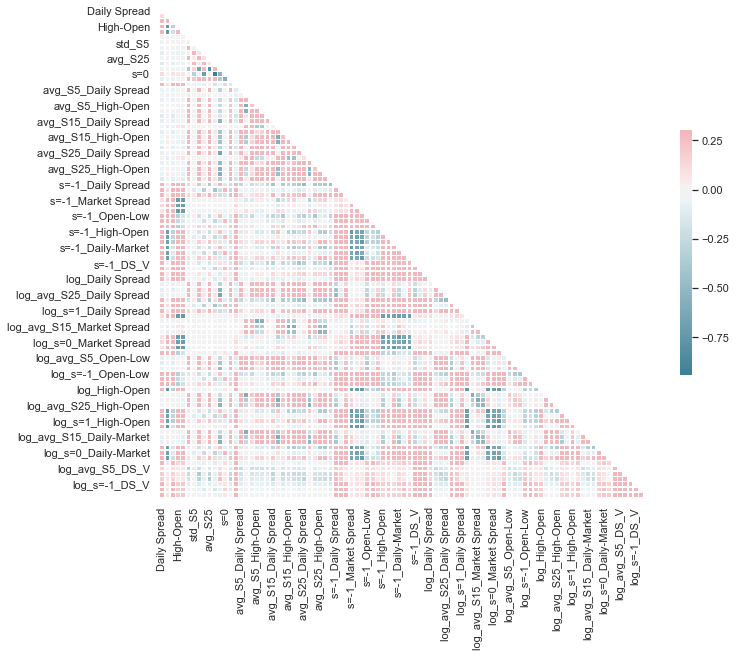

In [247]:
sn.set(style="white")
corr=train.iloc[:,32:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

In [24]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns=corr.columns[columns]
X_train=train[selected_columns]

# selected_columns: corr<95%

In [25]:
train.head(1)

,Open,Close,High,Low,Volume,Y,Label,S1,S2,S3,...,log_s=-1_Daily-Market,log_s=0_Daily-Market,log_s=1_Daily-Market,log_DS_V,log_avg_S5_DS_V,log_avg_S15_DS_V,log_avg_S25_DS_V,log_s=-1_DS_V,log_s=0_DS_V,log_s=1_DS_V
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11734.320312,11759.959961,11388.040039,212830000,48.029297,1,0,0,0,...,-2.169966,-1.764793,-2.639445,-2.160905,-9.21034,0.0,0.0,-3.298497,-2.893935,-3.766878


In [26]:
test.head(1)

,Open,Close,High,Low,Volume,Y,Label,S1,S2,S3,...,log_s=-1_Daily-Market,log_s=0_Daily-Market,log_s=1_Daily-Market,log_DS_V,log_avg_S5_DS_V,log_avg_S15_DS_V,log_avg_S25_DS_V,log_s=-1_DS_V,log_s=0_DS_V,log_s=1_DS_V
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-04,17910.019531,17900.099609,17937.960938,17814.810547,76270000,58.689453,1,0,0,1,...,-3.392277,-4.235618,-4.416559,-4.285966,-9.21034,0.0,0.0,-4.860091,-5.69033,-5.866749


In [27]:
selected_columns

Index(['Daily Spread', 'Market Spread', 'Open-Low', 'High-Open',
       'Daily-Market', 'avg_S5', 'std_S5', 'avg_S15', 'std_S15', 'avg_S25',
       'std_S25', 's=-1', 's=0', 's=1', 'DS_V', 'avg_S5_Daily Spread',
       'avg_S5_Open-Low', 'avg_S5_High-Open', 'avg_S5_DS_V',
       'avg_S15_Daily Spread', 'avg_S15_Open-Low', 'avg_S15_High-Open',
       'avg_S15_DS_V', 'avg_S25_Daily Spread', 'avg_S25_Open-Low',
       'avg_S25_High-Open', 'avg_S25_DS_V', 's=-1_Daily Spread',
       's=0_Daily Spread', 's=1_Daily Spread', 's=-1_Market Spread',
       's=0_Market Spread', 's=1_Market Spread', 's=-1_Open-Low',
       's=1_Open-Low', 's=-1_High-Open', 's=1_High-Open', 's=-1_Daily-Market',
       's=0_Daily-Market', 's=1_Daily-Market', 's=-1_DS_V', 's=1_DS_V',
       'log_Daily Spread', 'log_avg_S5_Daily Spread',
       'log_avg_S15_Daily Spread', 'log_avg_S25_Daily Spread',
       'log_s=-1_Daily Spread', 'log_s=0_Daily Spread', 'log_s=1_Daily Spread',
       'log_Market Spread', 'log_avg_S15

In [28]:
len(selected_columns)

69

# Part 4. Regression Model 
Use Random Forest Regression to build prediction model for "Outcome".

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regr = RandomForestRegressor(max_depth=5,n_estimators=1000)

#### Before features selection:

In [31]:
def rmse(targets,predictions):
    return np.sqrt(((targets-predictions)**2).mean())

In [32]:
regr1=regr.fit(train[selected_columns], train["Y"])

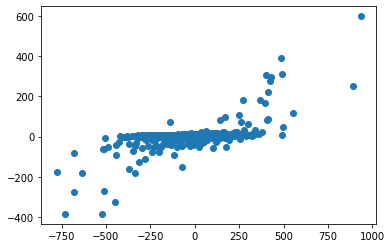

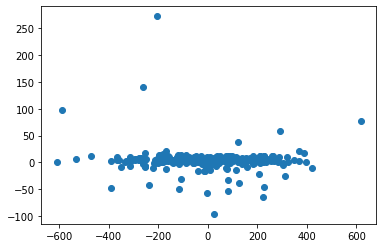

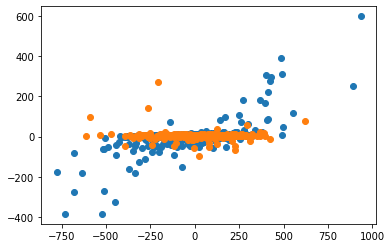

In [34]:
X_train = train[selected_columns]
y_train = train['Y']
X_test = test[selected_columns]
y_test = test['Y']
y_train_pred=regr1.predict(X_train)
y_test_pred=regr1.predict(X_test) # continuous 
plt.scatter(y_train,y_train_pred) # outliers
plt.show()
plt.scatter(y_test,y_test_pred)
plt.show()
plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_test_pred)
plt.show()

In [33]:
print("RMSE of Train: ",rmse(train["Y"],regr1.predict(train[selected_columns])))
print("RMSE of Test: ",rmse(test["Y"],regr1.predict(test[selected_columns])))

RMSE of Train:  122.15752993352905
RMSE of Test:  168.66529057368567


#### Features selection:

In [70]:
def forward_selection_regr(train, features):
    FORWARD = []
    SCORE = None
    TIMES = 0
    
    while True:
        if TIMES == int(np.log(len(train)) / np.log(2)):
            return FORWARD
        min_score = None
        index = 0
        for i in range(len(features)):
            if features[i] not in FORWARD:
                forward = FORWARD.copy()
                forward.append(features[i])
                regr = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=1000).fit(train[forward], train['Y'])
                score = rmse(train['Y'],regr.predict(train[forward]))
                if min_score is None or min_score > score:
                    min_score = score
                    index = i
        print('Variables selected:', FORWARD)
        print('Variable selected:', features[index], 'RMSE before selection:', SCORE, 'RMSE after selection:', min_score)
        print('Enter' if (SCORE is None or min_score < SCORE) else 'Do not enter')
        print(' ')
        if SCORE != None and min_score >= SCORE:
            return FORWARD
        else:
            FORWARD.append(features[index])
            SCORE = min_score
            TIMES += 1
        if len(FORWARD) == len(features):
            return FORWARD

In [262]:
reduced=forward_selection_regr(train,selected_columns)

Variables selected: []
Variable selected: s=1_DS_V RMSE before selection: None RMSE after selection: 127.05856667539814
Enter
 
Variables selected: ['s=1_DS_V']
Variable selected: s=0 RMSE before selection: 127.05856667539814 RMSE after selection: 125.65291704723474
Enter
 
Variables selected: ['s=1_DS_V', 's=0']
Variable selected: std_S15 RMSE before selection: 125.65291704723474 RMSE after selection: 124.70610158962172
Enter
 
Variables selected: ['s=1_DS_V', 's=0', 'std_S15']
Variable selected: log_avg_S25_DS_V RMSE before selection: 124.70610158962172 RMSE after selection: 124.32451708514307
Enter
 
Variables selected: ['s=1_DS_V', 's=0', 'std_S15', 'log_avg_S25_DS_V']
Variable selected: std_S5 RMSE before selection: 124.32451708514307 RMSE after selection: 123.93428089287242
Enter
 
Variables selected: ['s=1_DS_V', 's=0', 'std_S15', 'log_avg_S25_DS_V', 'std_S5']
Variable selected: s=-1 RMSE before selection: 123.93428089287242 RMSE after selection: 123.7703206147793
Enter
 
Variab

In [36]:
reduced

['s=1_DS_V',
 's=0',
 'std_S15',
 'log_avg_S25_DS_V',
 'std_S5',
 's=-1',
 'std_S25',
 's=1',
 'log_avg_S15_DS_V']

In [37]:
regr2=regr.fit(train[reduced],train['Y'])

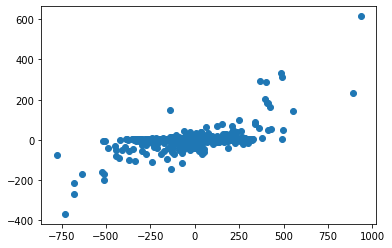

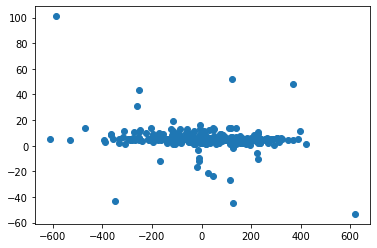

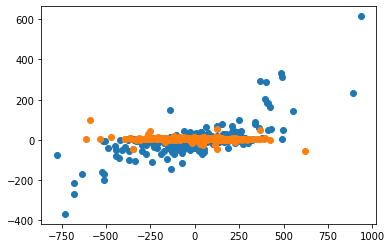

In [39]:
X_train = train[reduced]
y_train = train['Y']
X_test = test[reduced]
y_test = test['Y']
y_train_pred=regr2.predict(X_train)
y_test_pred=regr2.predict(X_test) # continuous 
plt.scatter(y_train,y_train_pred) # outliers
plt.show()
plt.scatter(y_test,y_test_pred)
plt.show()
plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_test_pred)
plt.show()

In [38]:
print("RMSE of Train: ",rmse(train["Y"],regr2.predict(train[reduced])))
print("RMSE of Test: ",rmse(test["Y"],regr2.predict(test[reduced])))

RMSE of Train:  123.55163693295526
RMSE of Test:  168.09106101209284


# Part 5. Classification Model

Use Random Forest Classfication to build prediction model for the "Label".

#### Before features selection:

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [42]:
rf = RandomForestClassifier(max_depth=5,n_estimators = 1000).fit(train[selected_columns], train['Label'])

In [43]:
print("AUC of Train",roc_auc_score(train['Label'], rf.predict(train[selected_columns])))
print("AUC of Test",roc_auc_score(test['Label'], rf.predict(test[selected_columns])))

AUC of Train 0.6716206247456247
AUC of Test 0.507640369580668


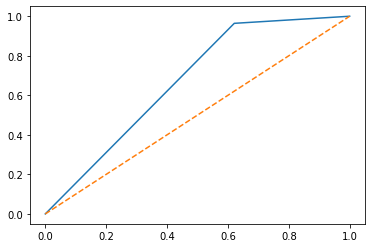

0.6716206247456247


In [44]:
fpr, tpr, _ = roc_curve(train['Label'], rf.predict(train[selected_columns]))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print(auc(fpr, tpr))

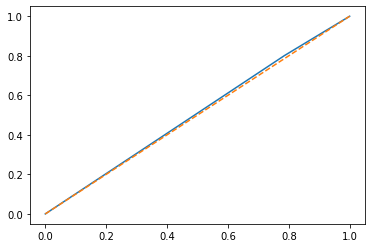

0.507640369580668


In [45]:
fpr, tpr, _ = roc_curve(test['Label'], rf.predict(test[selected_columns]))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print(auc(fpr, tpr))

#### Features selection:

##### Forward selection

In [285]:
def forward_selection_class(train, features):
    FORWARD = ['Intercept']
    rf = RandomForestClassifier(max_depth=6,n_estimators = 1000).fit(train[FORWARD], train['Label'])
    SCORE = roc_auc_score(train['Label'], rf.predict(train[FORWARD]))
    TIMES = 0
    
    while True:
        if TIMES == int(np.log(len(train)) / np.log(2)):
            return FORWARD
        max_score = None
        index = 0
        for i in range(len(features)):
            if features[i] not in FORWARD:
                forward = FORWARD.copy()
                forward.append(features[i])
                rf = RandomForestClassifier(n_estimators = 1000).fit(train[forward], train['Label'])
                score = roc_auc_score(train['Label'], rf.predict(train[forward]))
                if max_score is None or max_score < score:
                    max_score = score
                    index = i
        print('Variables selected:', FORWARD)
        print('Variable selected:', features[index], 'AUC before selection:', SCORE, 'AUC after selection:', max_score)
        print('Enter' if max_score > SCORE else 'Do not enter')
        print(' ')
        if max_score <= SCORE:
            return FORWARD
        else:
            FORWARD.append(features[index])
            SCORE = max_score
            TIMES += 1

In [50]:
train['Intercept']=1
test['Intercept']=1

In [287]:
reduced2=forward_selection_class(train,selected_columns)

Variables selected: ['Intercept']
Variable selected: DS_V AUC before selection: 0.5 AUC after selection: 0.8104395604395604
Enter
 
Variables selected: ['Intercept', 'DS_V']
Variable selected: std_S25 AUC before selection: 0.8104395604395604 AUC after selection: 0.8472095034595034
Enter
 
Variables selected: ['Intercept', 'DS_V', 'std_S25']
Variable selected: avg_S15 AUC before selection: 0.8472095034595034 AUC after selection: 0.9177414021164021
Enter
 
Variables selected: ['Intercept', 'DS_V', 'std_S25', 'avg_S15']
Variable selected: std_S5 AUC before selection: 0.9177414021164021 AUC after selection: 0.9723048941798942
Enter
 
Variables selected: ['Intercept', 'DS_V', 'std_S25', 'avg_S15', 'std_S5']
Variable selected: avg_S5 AUC before selection: 0.9723048941798942 AUC after selection: 0.9845975783475784
Enter
 
Variables selected: ['Intercept', 'DS_V', 'std_S25', 'avg_S15', 'std_S5', 'avg_S5']
Variable selected: s=-1 AUC before selection: 0.9845975783475784 AUC after selection: 0.9

In [51]:
reduced2

['Intercept',
 'DS_V',
 'std_S25',
 'avg_S15',
 'std_S5',
 'avg_S5',
 's=-1',
 'std_S15']

In [52]:
rf1 = RandomForestClassifier(n_estimators=1000,max_depth=4).fit(train[reduced2], train['Label'])

In [53]:
print("AUC of Train",roc_auc_score(train['Label'], rf1.predict(train[reduced2])))
print("AUC of Test",roc_auc_score(test['Label'], rf1.predict(test[reduced2])))

AUC of Train 0.5489417989417988
AUC of Test 0.4975758960300538


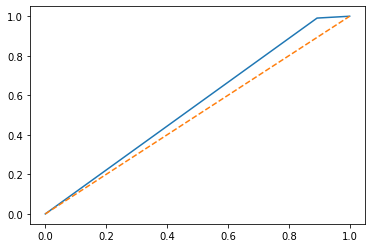

0.5489417989417988


In [54]:
fpr, tpr, _ = roc_curve(train['Label'], rf1.predict(train[reduced2]))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print(auc(fpr, tpr))

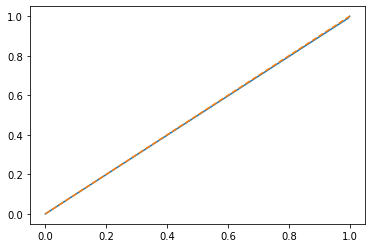

0.4975758960300538


In [55]:
fpr, tpr, _ = roc_curve(test['Label'], rf1.predict(test[reduced2]))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print(auc(fpr, tpr))

# Part 6. Comparison of Performance

Use signals achieved from Part 4 and Part 5 and trade stock using test data. Calcualte simple rate of daily return and maximum drawdown.

In [56]:
train['RoR']=(train['Close'].shift(-1)-train['Close'])/train['Close']
train['RoR_Y']=train['RoR']*train['Label']
train['Total_RoR_Y']=np.cumsum(train['RoR_Y'])
train['Drawdown']=train['Total_RoR_Y'].cummax()-train['Total_RoR_Y'].cummin()

In [57]:
test['RoR']=(test['Close'].shift(-1)-test['Close'])/test['Close']
test['RoR_Y']=test['RoR']*test['Label']
test['Total_RoR_Y']=np.cumsum(test['RoR_Y'])
test['Drawdown']=test['Total_RoR_Y'].cummax()-test['Total_RoR_Y'].cummin()

#### Random Forest Regression

In [58]:
regr_pred_train=pd.DataFrame(index=train.index)

In [59]:
regr_pred_train['Y']=regr2.predict(train[reduced])
regr_pred_train["Label"]=[1 if y>0 else 0 for y in regr_pred_train["Y"]]
regr_pred_train["RoR"]=train['RoR']
regr_pred_train['RoR_Y']=regr_pred_train['RoR']*regr_pred_train['Label']
regr_pred_train['Total_RoR_Y']=np.cumsum(regr_pred_train['RoR_Y'])
regr_pred_train['Drawdown']=regr_pred_train['Total_RoR_Y'].cummax()-regr_pred_train['Total_RoR_Y'].cummin()

In [60]:
regr_pred_test=pd.DataFrame(index=test.index)

In [61]:
regr_pred_test['Y']=regr2.predict(test[reduced])
regr_pred_test["Label"]=[1 if y>0 else 0 for y in regr_pred_test["Y"]]
regr_pred_test["RoR"]=test['RoR']
regr_pred_test['RoR_Y']=regr_pred_test['RoR']*regr_pred_test['Label']
regr_pred_test['Total_RoR_Y']=np.cumsum(regr_pred_test['RoR_Y'])
regr_pred_test['Drawdown']=regr_pred_test['Total_RoR_Y'].cummax()-regr_pred_test['Total_RoR_Y'].cummin()

#### Random Forest Classification

In [62]:
class_pred_train=pd.DataFrame(index=train.index)

In [63]:
class_pred_train["Label"]=rf1.predict(train[reduced2])
class_pred_train["RoR"]=train['RoR']
class_pred_train['RoR_Y']=class_pred_train['RoR']*class_pred_train['Label']
class_pred_train['Total_RoR_Y']=np.cumsum(class_pred_train['RoR_Y'])
class_pred_train['Drawdown']=class_pred_train['Total_RoR_Y'].cummax()-class_pred_train['Total_RoR_Y'].cummin()

In [64]:
class_pred_test=pd.DataFrame(index=test.index)

In [65]:
class_pred_test["Label"]=rf1.predict(test[reduced2])
class_pred_test["RoR"]=test['RoR']
class_pred_test['RoR_Y']=class_pred_test['RoR']*class_pred_test['Label']
class_pred_test['Total_RoR_Y']=np.cumsum(class_pred_test['RoR_Y'])
class_pred_test['Drawdown']=class_pred_test['Total_RoR_Y'].cummax()-class_pred_test['Total_RoR_Y'].cummin()

#### Comparsion

##### Simple Rate of Daily Return

In [66]:
print("Mean of Simple Rate of Daily Return of Train: ",train['RoR_Y'].mean())
print("Mean of Simple Rate of Daily Return of RFR Train: ",regr_pred_train['RoR_Y'].mean())
print("Mean of Simple Rate of Daily Return of RFC Train: ",class_pred_train['RoR_Y'].mean())

Mean of Simple Rate of Daily Return of Train:  0.0043490734084993205
Mean of Simple Rate of Daily Return of RFR Train:  0.0015334075747000595
Mean of Simple Rate of Daily Return of RFC Train:  0.0009967812813317686


In [67]:
print("Mean of Simple Rate of Daily Return of Test: ",test['RoR_Y'].mean())
print("Mean of Simple Rate of Daily Return of RFR Test: ",regr_pred_test['RoR_Y'].mean())
print("Mean of Simple Rate of Daily Return of RFC Test: ",class_pred_test['RoR_Y'].mean())

Mean of Simple Rate of Daily Return of Test:  0.0036654783531025912
Mean of Simple Rate of Daily Return of RFR Test:  -9.923656746092151e-05
Mean of Simple Rate of Daily Return of RFC Test:  6.561380789088979e-05


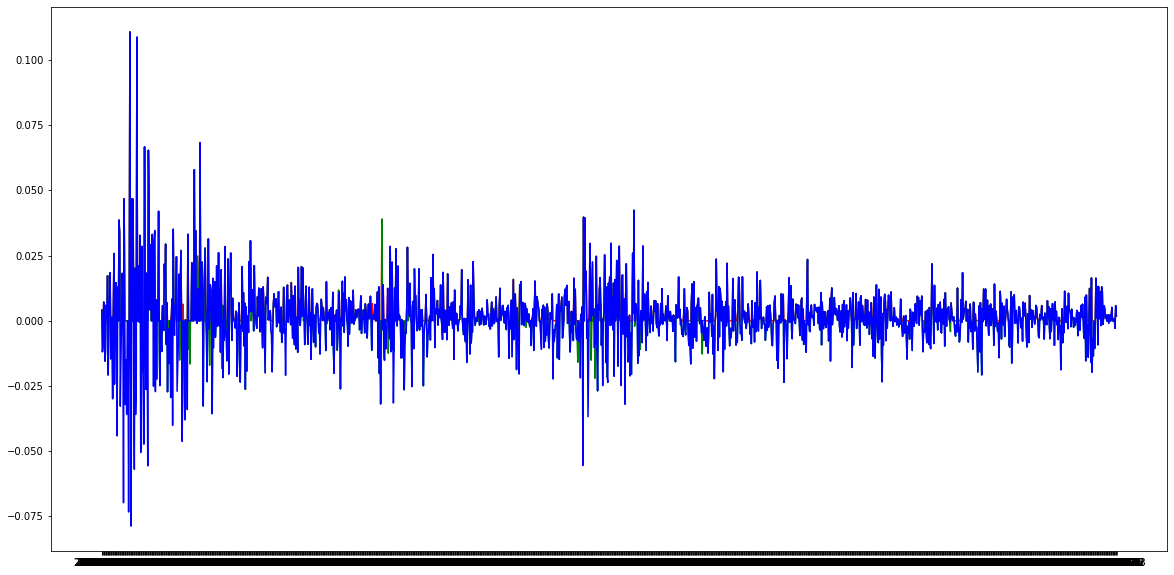

In [68]:
plt.figure(figsize=(20,10))
plt.plot(train.index,train['RoR_Y'],color='red')
plt.plot(train.index,regr_pred_train['RoR_Y'],color='green')
plt.plot(train.index,class_pred_train['RoR_Y'],color='blue')
plt.show()

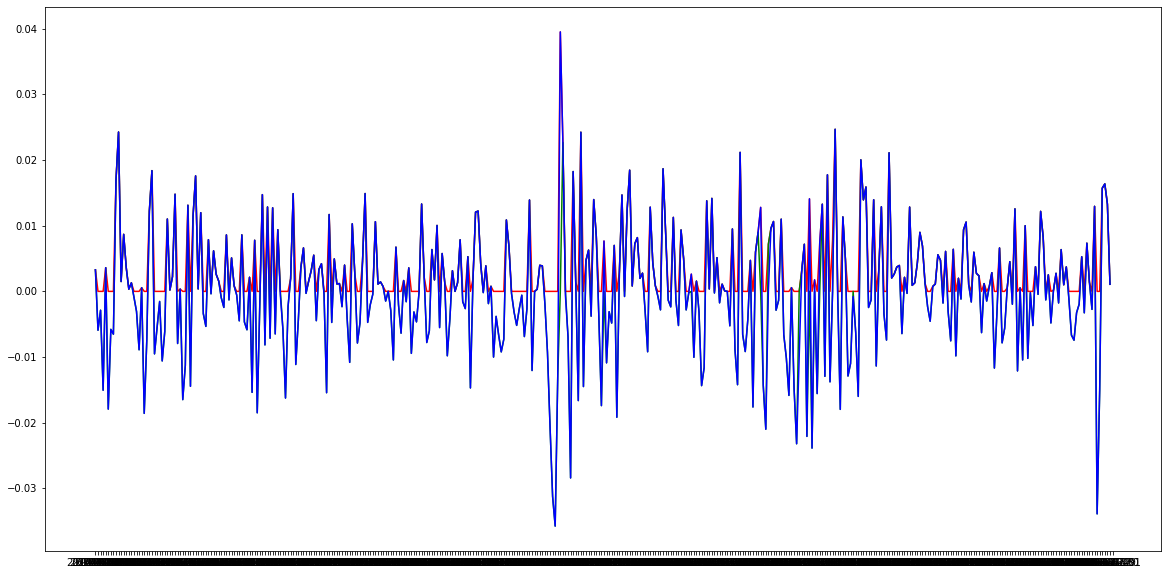

In [69]:
plt.figure(figsize=(20,10))
plt.plot(test.index,test['RoR_Y'],color='red')
plt.plot(test.index,regr_pred_test['RoR_Y'],color='green')
plt.plot(test.index,class_pred_test['RoR_Y'],color='blue')
plt.show()

##### Maximum Drawdown

In [70]:
print("Max Drawdown of Train: ",train['Drawdown'].max())
print("Max Drawdown of Train: ",regr_pred_train['Drawdown'].max())
print("Max Drawdown of Train: ",class_pred_train['Drawdown'].max())

Max Drawdown of Train:  6.915282731226218
Max Drawdown of Train:  2.4804795347150055
Max Drawdown of Train:  1.7706349276523474


In [71]:
print("Max Drawdown of Test: ",test['Drawdown'].max())
print("Max Drawdown of Test: ",regr_pred_test['Drawdown'].max())
print("Max Drawdown of Test: ",class_pred_test['Drawdown'].max())

Max Drawdown of Test:  1.4482507056828293
Max Drawdown of Test:  0.2166841561537761
Max Drawdown of Test:  0.15076287613010658


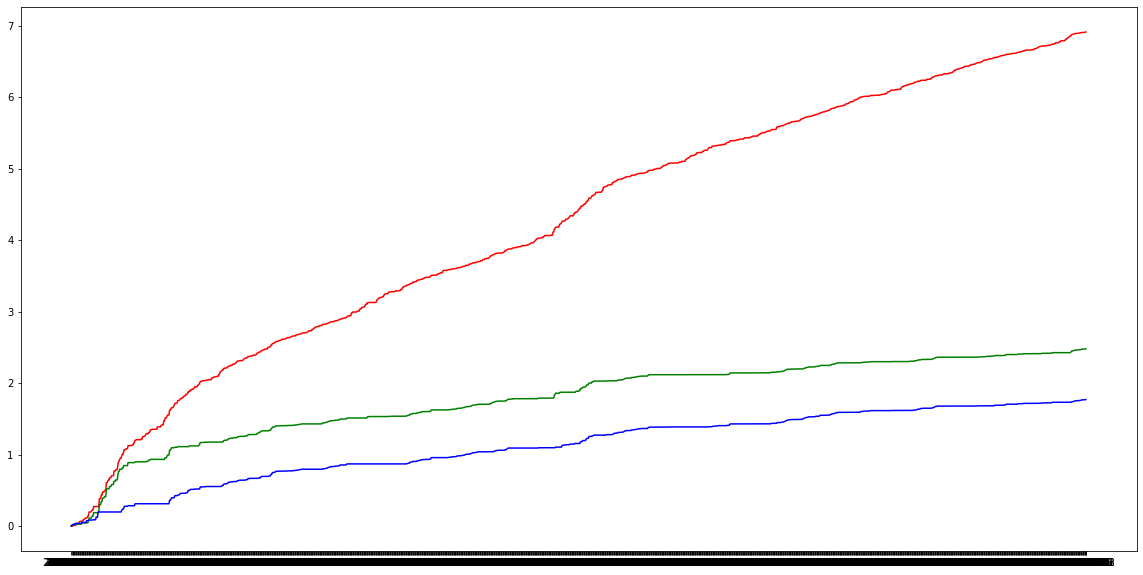

In [72]:
plt.figure(figsize=(20,10))
plt.plot(train.index,train['Drawdown'],color='red')
plt.plot(train.index,regr_pred_train['Drawdown'],color='green')
plt.plot(train.index,class_pred_train['Drawdown'],color='blue')
plt.show()

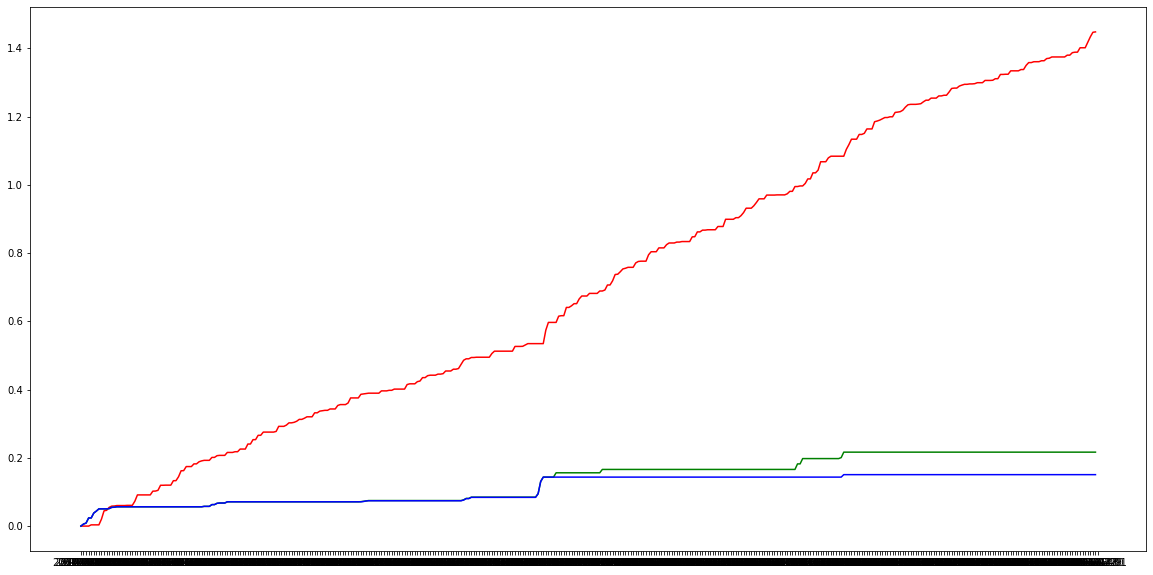

In [73]:
plt.figure(figsize=(20,10))
plt.plot(test.index,test['Drawdown'],color='red')
plt.plot(test.index,regr_pred_test['Drawdown'],color='green')
plt.plot(test.index,class_pred_test['Drawdown'],color='blue')
plt.show()

# Conclusion

Since the simple rate of return is larger and the maximum drawdown is smaller for the results from Random Forest Classifier, the signal predicted from Random Forest Classifier gives a better performance.